<a href="https://colab.research.google.com/github/Dammonoit/Python_Arsenal/blob/master/Python_Basics_to_advanced/Python%20Closures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Closures**

## **Topics**
- **Introduction**
- **Returning an inner function**
- **Python cells and multi-scoped variables**
- **When Python creates the closure**
- **Python closures and for loop**


## **Introduction**
* In Python, you can define a function from the inside of another function. And this function is called a nested function. 
* For example:


In [2]:
def say():
    greeting = 'Hello'

    def display():
        print(greeting)

    display()
say()

Hello


* In this example, we define the display function inside the say function. The display function is called a **nested function**.

* Inside the display function, you access the greeting variable from its **nonlocal** scope.

* Python calls the greeting variable as a **free variable**.

* When you look at the display function, you actually look at:

    * The display function itself.
    * And the free variable greeting with the value 'Hello'.
* So the **combination of the display function and greeting variable is called a closure**:
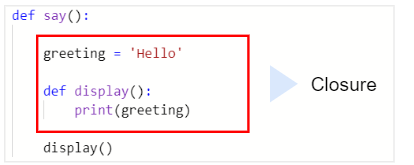

* By definition, a closure is a **nested function that references one or more variables from its enclosing scope**.

## **Returning an inner function**
* In Python, a function can return a value which is another function. For example:

In [8]:
def say():
    greeting = 'Hello'

    def display():
        print(greeting)

    return display   
print(say())
response = say()
response()


<function say.<locals>.display at 0x7fc324d70710>
Hello


* In this example, the say function returns the display function instead of executing it.

* Also, when the say function returns the display function, it actually returns the closure:
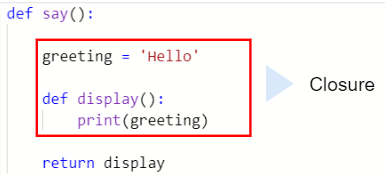

* The following assigns the return value of the say function to a variable fn. Since fn is a function, you can execute it:


In [ ]:
fn = say()
fn()

Hello


* The say function executes and returns a function. When the fn function executes, the say function already completes.

* In other words, the scope of the say function was gone at the time the fn function executes.

* Since the greeting variable belongs to the scope of the say function, it should also be destroyed with the scope of the function.

* However, you still see that fn displays the value of the message variable.

## **Python cells and multi-scoped variables**
* The value of the message variable is shared between two scopes of:

    * The say function.
    * The closure
* The label message is in two different scopes. However, they always reference the same string object with the value 'Hello'.

* To achieve this, Python creates an intermediary object called a cell:
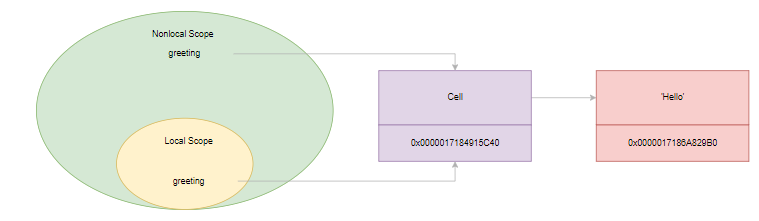

* To find the memory address of the cell object, you can use the __closure__ property as follows:

In [10]:
print(response.__closure__)

(<cell at 0x7fc324d01290: str object at 0x7fc3291e6bb0>,)


* The __closure__ returns a tuple of cells.

* In this example, the memory address of the cell is 0x7fc324d01290. It references a string object at 0x7fc3291e6bb0.

* If you display the memory address of the string object in the say function and closure, you should see that they reference the same object in the memory:


In [ ]:
def say():
    greeting = 'Hello'
    print(hex(id(greeting)))

    def display():
        print(hex(id(greeting)))
        print(greeting)

    return display


fn = say()
fn()


0x7faa3c1312f0
0x7faa3c1312f0
Hello


* When you access the value of the greeting variable, Python will technically “double-hop” to get the string value.

* This explains why when the say() function was out of scope, you still can access the string object referenced by the greeting variable.

* Based on this mechanism, you can think of a closure as a function and an extended scope that contains free variables.

* To find the free variables that a closure contains, you can use the __code__.co_freevars, for example:


In [ ]:
def say():

    greeting = 'Hello'

    def display():
        print(greeting)

    return display


fn = say()
print(fn.__code__.co_freevars)

('greeting',)


* In this example, the fn.__code__.co_freevars returns the greeting free variable of the fn closure.

## **When Python creates the closure**
* Python creates a new scope when a function executes. 
* If that function creates a closure, Python also creates a new closure as well. Consider the following example:

* First, define a function called **multiplier** that returns a closure:


In [ ]:
def multiplier(x):
    def multiply(y):
        return x * y
    return multiply

* The multiplier function returns the multiplication of two arguments. However, it uses a closure instead.

* Second, call the multiplier function three times:


In [ ]:
m1 = multiplier(1)
m2 = multiplier(2)
m3 = multiplier(3)

* These function calls create three closures. Each function multiplies a number with 1, 2, and 3.

* Third, execute functions of the closures:


In [ ]:
print(m1(10))
print(m2(10))
print(m3(10))

10
20
30


* The m1, m2, and m3 have different instances of closure.

## **Python closures and for loop**
* Suppose that you want to create all three closures above at once and you might come up with the following:


In [11]:
multipliers = []
for x in range(1, 4):
    multipliers.append(lambda y: x * y)
print(multipliers)
m1, m2, m3 = multipliers

print(m1(10))
print(m2(10))
print(m3(10))


[<function <lambda> at 0x7fc324c21b00>, <function <lambda> at 0x7fc324c21cb0>, <function <lambda> at 0x7fc324c21c20>]
30
30
30


#### **How it works.**

* First, declare a list that will store the closures.
* Second, use a lambda expression to create a closure and append the closure to the list in each iteration.
* Third, unpack the closures from the list to the m1, m2, and m3 variables.
* Finally, pass the values 10, 20, and 30 to each closure and execute it.
The following shows the output:
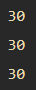
* This doesn’t work as you expected. But why?

* The x starts from 1 to 3 in the loop. After the loop, its value is 3.

* Each element of the list is the following closure:

* This doesn’t work as you expected. But why?

* The x starts from 1 to 3 in the loop. After the loop, its value is 3.

* Each element of the list is the following closure:
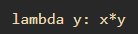

* Python evaluates x when you call the m1(10), m2(10), and m3(10). At the moment the closures execute, x is 3.

* That’s why you see the same result when you call m1(10), m2(10), and m3(10).

* To fix this, you need to instruct Python to evaluate x in the loop:


In [12]:
def multiplier(x):
    def multiply(y):
        return x * y
    return multiply


multipliers = []
for x in range(1, 4):
    multipliers.append(multiplier(x))
print(multipliers)
m1, m2, m3 = multipliers

print(m1(10))
print(m2(10))
print(m3(10))


[<function multiplier.<locals>.multiply at 0x7fc324c2ce60>, <function multiplier.<locals>.multiply at 0x7fc324c2cef0>, <function multiplier.<locals>.multiply at 0x7fc324c2cf80>]
10
20
30


* A closure is a function and an extended scope that contains free variables.